In [1]:
import keras
#from PIL import Image
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
#from PIL import Image
from keras.utils import to_categorical
import random

In [2]:
image1 = [None] * 1573
label1 = [None] * 1573
image2 = [None] * 1573
label2 = [None] * 1573
#创建数据集列表
data_amount = 0

n = 0

#insulting
for i in range(1,1571):
    #
    data_place_one = './data_training_20240217/insulting/' + str(i) + '.jpg'
    #print(data_place_one)
    img_2 = cv2.imread(data_place_one)
    if img_2 is not None:
        n += 1
        data_amount += 1
        image1[i-1] = np.array(img_2)
        label1[i-1] = 1
    else:
        pass
        #print("Failed to load image. or not exist")

#uninsulting
for i in range(1,1571):
    data_place_one = './data_training_20240217/uninsulting/' + str(i) + '.jpg'
    #print(data_place_one)
    img_2 = cv2.imread(data_place_one)
    if img_2 is not None:
        n += 1
        data_amount += 1
        image2[i-1] = np.array(img_2)
        label2[i-1] = 0
    else:
        pass
        #print("Failed to load image. or not exist")
#print(img)

label = label1+label2
image = image1+image2

#删除空值
label = [x for x in label if x != None]
image = [x for x in image if np.any(x)]


combined_list = list(zip(label, image))
# 打乱元组列表
random.shuffle(combined_list)
# 恢复两个列表
label, image = zip(*combined_list)

val_image = image[1000:1400]
val_label = label[1000:1400]
test_image = image[1400:]
test_label = label[1400:]
image = image[:1000]
label = label[:1000]

In [3]:
label = np.array(label)
image = np.array(image)
val_label = np.array(val_label)
val_image = np.array(val_image)
test_label = np.array(test_label)
test_image = np.array(test_image)
#print(train_label.shape)
# 将标签数据进行one-hot编码
label_encoded = to_categorical(label, num_classes=2)
test_label_encoded = to_categorical(test_label, num_classes=2)
val_label_encoded = to_categorical(val_label, num_classes=2)

In [4]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [5]:
inputs_emoji = keras.Input(shape=(128,128,3))
x = data_augmentation(inputs_emoji)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32,kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32,kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32,kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32,kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32,kernel_size=3,activation="relu")(x)
x = layers.Flatten()(x)
outputs_result = layers.Dense(2,activation="sigmoid")(x)
model = keras.Model(inputs = inputs_emoji,outputs = outputs_result)

In [6]:
model.summary()
keras.utils.plot_model(model,show_shapes=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                             

In [7]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [8]:
epochs_ = 100
history = model.fit(image,
        label_encoded,
        epochs=epochs_,
        batch_size=100,
        validation_data=(val_image,val_label_encoded)
        )

Epoch 1/100
10/10 [==============================] - 5s 413ms/step - loss: 0.6896 - accuracy: 0.5650 - val_loss: 0.6624 - val_accuracy: 0.6325
Epoch 2/100
10/10 [==============================] - 4s 366ms/step - loss: 0.6663 - accuracy: 0.6180 - val_loss: 0.6485 - val_accuracy: 0.6350
Epoch 3/100
10/10 [==============================] - 4s 380ms/step - loss: 0.6454 - accuracy: 0.6190 - val_loss: 0.6341 - val_accuracy: 0.6325
Epoch 4/100
10/10 [==============================] - 4s 378ms/step - loss: 0.6515 - accuracy: 0.6390 - val_loss: 0.6612 - val_accuracy: 0.6100
Epoch 5/100
10/10 [==============================] - 4s 375ms/step - loss: 0.6435 - accuracy: 0.6230 - val_loss: 0.6324 - val_accuracy: 0.6300
Epoch 6/100
10/10 [==============================] - 4s 393ms/step - loss: 0.6444 - accuracy: 0.6310 - val_loss: 0.6340 - val_accuracy: 0.6250
Epoch 7/100
10/10 [==============================] - 4s 390ms/step - loss: 0.6467 - accuracy: 0.6220 - val_loss: 0.6273 - val_accuracy: 0.6400

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


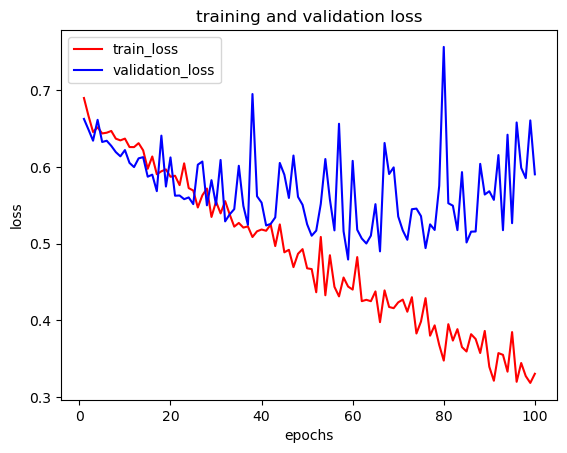

In [9]:
history_dir = history.history
print(history_dir.keys())
loss_values = history_dir["loss"]
accuracy_values = history_dir["accuracy"]
val_loss_values = history_dir["val_loss"]
val_accuracy_values = history_dir["val_accuracy"]
x_epochs = range(1,epochs_+1)
plt.plot(x_epochs,loss_values,"r",label = "train_loss")
plt.plot(x_epochs,val_loss_values,"b",label = "validation_loss")
plt.title("training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

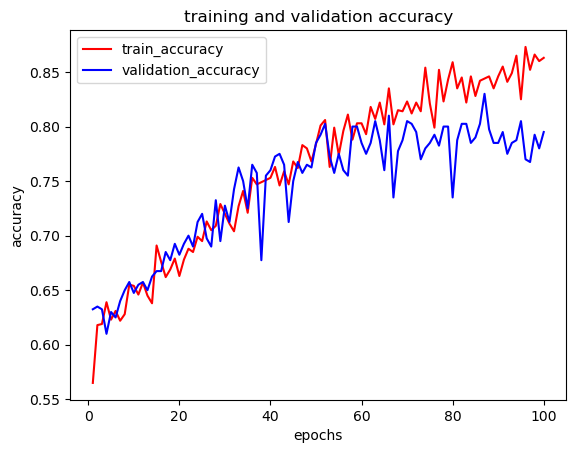

In [10]:
plt.plot(x_epochs,accuracy_values,"r",label = "train_accuracy")
plt.plot(x_epochs,val_accuracy_values,"b",label = "validation_accuracy")
plt.title("training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [11]:
results = model.evaluate(test_image,test_label_encoded)
print("test_loss:",results[0],"; test_accuracy:",results[1])

y = np.argmax(model.predict(test_image[:]),axis=1)
print('原始：',y[:20])
print('结果：',test_label[:20])

55/55 [==============================] - 2s 28ms/step - loss: 0.6649 - accuracy: 0.7523
test_loss: 0.6648705005645752 ; test_accuracy: 0.7522988319396973
55/55 [==============================] - 2s 31ms/step
原始： [1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0]
结果： [1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0]
